In [1]:
#import library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Load the dataset
data = pd.read_csv('solution.csv')  

In [3]:
# Step 3: Data Preprocessing

# Generate synthetic columns
np.random.seed(0)
data['Area'] = np.random.randint(500, 4000, size=data.shape[0])  # Area in square feet
data['Bedrooms'] = np.random.randint(1, 6, size=data.shape[0])    # Number of bedrooms
data['Location'] = np.random.choice(['Urban', 'Suburban', 'Rural'], size=data.shape[0])  # Location type

# One-hot encode the 'Location' feature
data_encoded = pd.get_dummies(data, columns=['Location'], drop_first=True)

# Scale 'Area' and 'Bedrooms' columns
scaler = MinMaxScaler()
data_encoded[['Area', 'Bedrooms']] = scaler.fit_transform(data_encoded[['Area', 'Bedrooms']])


In [4]:
#split the data in  features (X) and target (y)
X = data_encoded.drop(columns=['Id', 'SalePrice'])  # Drop irrelevant columns
y = data_encoded['SalePrice']                       # Target is SalePrice

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


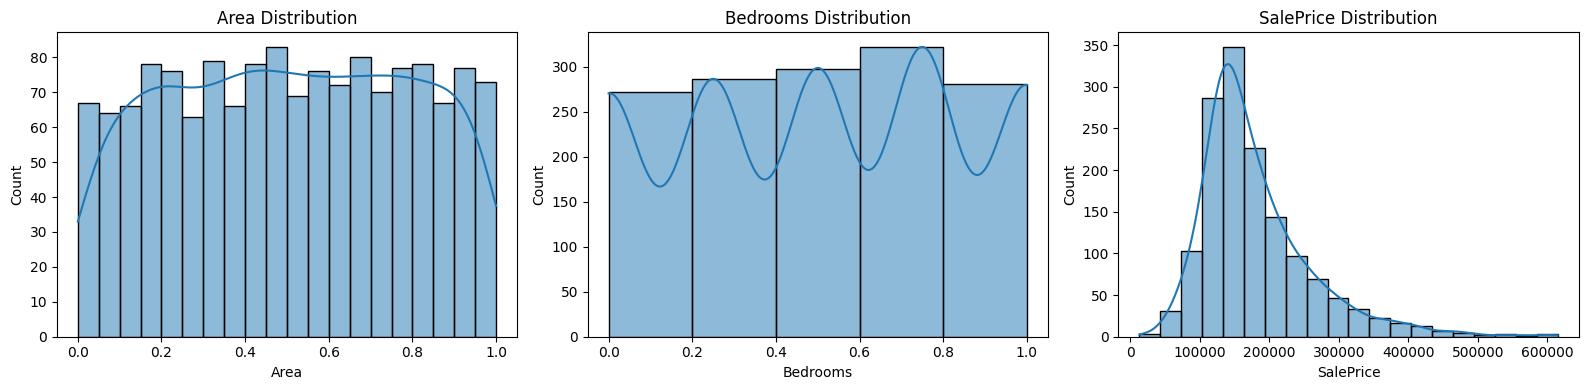

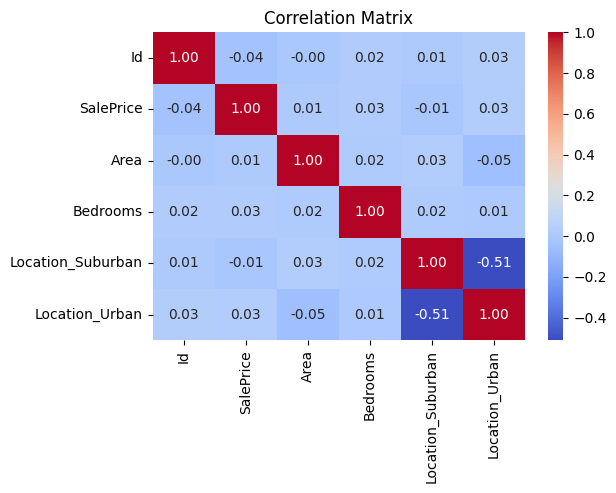

In [5]:
# Step 4: Exploratory Data Analysis (EDA)
# Plot histograms for distributions
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.histplot(data_encoded['Area'], bins=20, kde=True)
plt.title('Area Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data_encoded['Bedrooms'], bins=5, kde=True)
plt.title('Bedrooms Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data_encoded['SalePrice'], bins=20, kde=True)
plt.title('SalePrice Distribution')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [6]:
# Step 5: Model Selection 
# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=0)

# Train Linear Regression model
linear_model.fit(X_train, y_train)

# Train Decision Tree model
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [7]:
# Step 6: Model Evaluation
# Evaluation function
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

# Evaluate Linear Regression
linear_metrics = evaluate_model(linear_model, X_test, y_test)

# Evaluate Decision Tree
tree_metrics = evaluate_model(tree_model, X_test, y_test)

# Print the evaluation results
print("Linear Regression - MAE:", linear_metrics[0], "MSE:", linear_metrics[1], "R^2:", linear_metrics[2])
print("Decision Tree - MAE:", tree_metrics[0], "MSE:", tree_metrics[1], "R^2:", tree_metrics[2])


Linear Regression - MAE: 61172.61719680532 MSE: 6970553654.981991 R^2: -0.0009548574924758135
Decision Tree - MAE: 95924.62671232877 MSE: 17439833673.54452 R^2: -1.5043184649929127


In [8]:
#cross validation 

from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-validation for Decision Tree
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE for Decision Tree:", -cv_scores.mean())

# Hyperparameter tuning for Decision Tree using GridSearchCV
param_grid = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search.best_params_)


Cross-validated MSE for Decision Tree: 13197174488.82024
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 10}


In [11]:

# pip install streamlit


In [13]:

# Save the Model:
# Ensure all necessary imports are included
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Load and prepare your dataset
data = pd.read_csv('solution.csv')  # Load your dataset
np.random.seed(0)
data['Area'] = np.random.randint(500, 4000, size=data.shape[0])
data['Bedrooms'] = np.random.randint(1, 6, size=data.shape[0])
data['Location'] = np.random.choice(['Urban', 'Suburban', 'Rural'], size=data.shape[0])

# One-hot encode 'Location' column
data_encoded = pd.get_dummies(data, columns=['Location'], drop_first=True)

# Normalize 'Area' and 'Bedrooms' columns
scaler = MinMaxScaler()
data_encoded[['Area', 'Bedrooms']] = scaler.fit_transform(data_encoded[['Area', 'Bedrooms']])

# Split data into features and target
X = data_encoded.drop(columns=['Id', 'SalePrice'])
y = data_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=0)
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

# Now save the models
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(tree_model, 'tree_model.pkl')



['tree_model.pkl']